 #                             Kaggle Competition: EDSA Apple Prices Challenge

In this notebook we will focus on:
 - Data cleaning an fromatting (confirmatory data analysis)
 - Evaluate the best model on the testing set

**Getting started**

In [107]:
#import libraries
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import norm
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

Now we will load the train data set of the EDSA Apple Prices Challenge

In [108]:
# load train set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")
test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [109]:
# First view of the train set
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [110]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [111]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [112]:
df.shape

(64376, 13)

In [113]:
#filtering out the Apple golden delicious
apples_df_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
apples_df = apples_df_filter.copy()
apples_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [114]:
#shape of the new train data
apples_df.shape

(1952, 13)

In [115]:
#descriptive statistics summary
apples_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [116]:
#summary of avg_price_per_kg
apples_df['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

C:\Users\rinki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


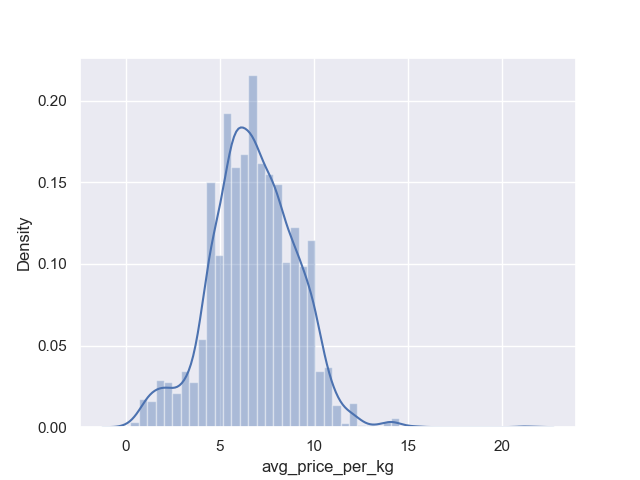

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

In [117]:
#histogram
sns.distplot(apples_df['avg_price_per_kg'])
#or use the ff code
# sns.displot(apples_df['avg_price_per_kg'])

In [118]:
#skewness and kurtosis
print("Skewness: %f" % apples_df['avg_price_per_kg'].skew())
print("Kurtosis: %f" % apples_df['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


<IPython.core.display.Javascript object>


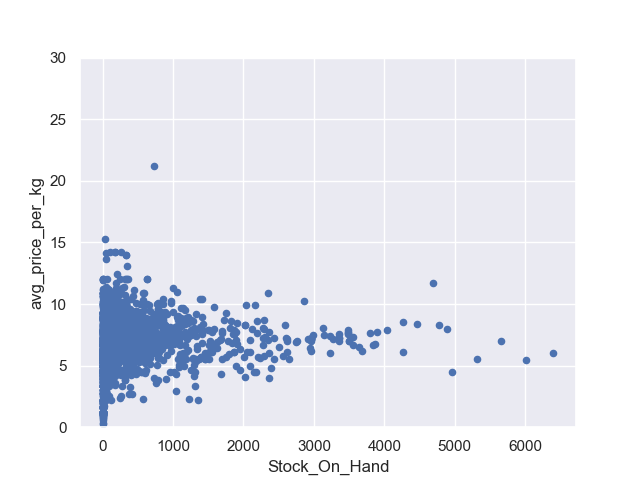

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [119]:
#scatter plot Stock_On_Hand/avg_price_per_kg
var = 'Stock_On_Hand'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

<IPython.core.display.Javascript object>


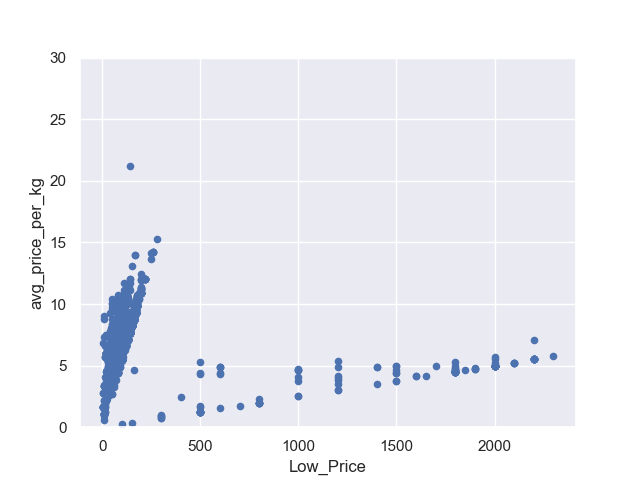

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [120]:
#scatter plot Low_Price/avg_price_per_kg
var = 'Low_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

<IPython.core.display.Javascript object>


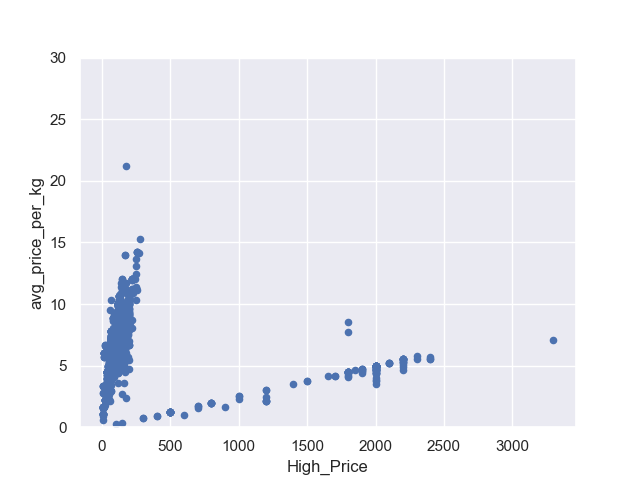

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [121]:
#scatter plot High_Price/avg_price_per_kg
var = 'High_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

<IPython.core.display.Javascript object>


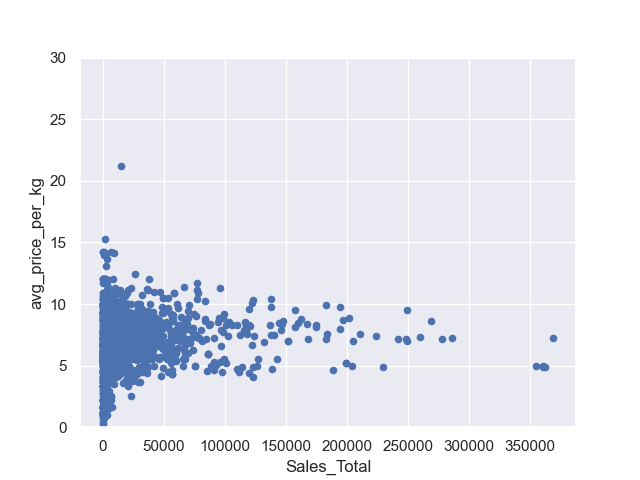

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [122]:
#scatter plot Sales_Total/avg_price_per_kg
var = 'Sales_Total'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

<IPython.core.display.Javascript object>


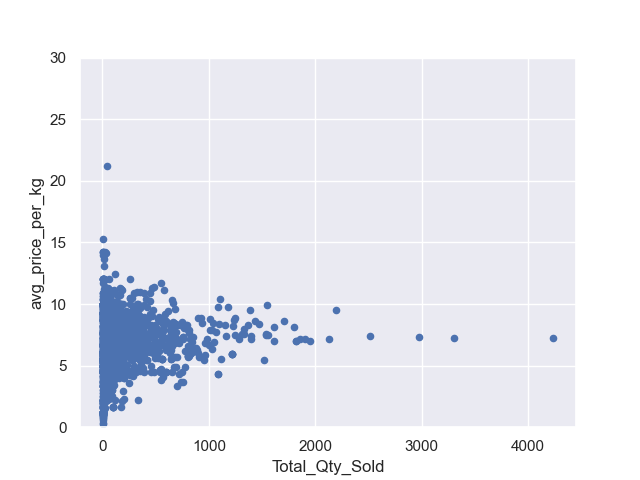

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [123]:
#scatter plot Total_Qty_Sold/avg_price_per_kg
var = 'Total_Qty_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

<IPython.core.display.Javascript object>


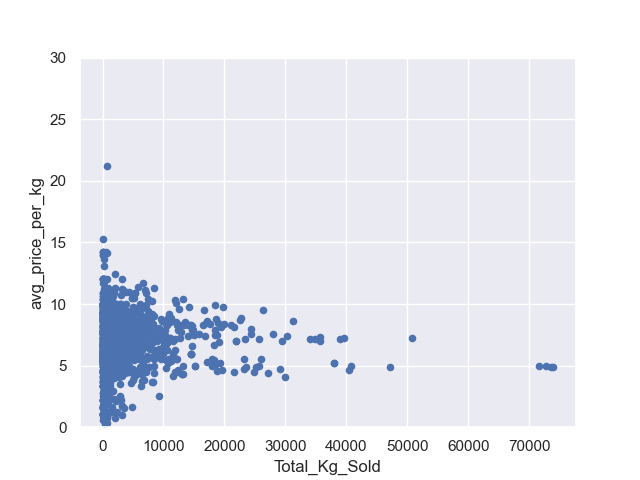

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [124]:
#scatter plot Total_Kg_Sold/avg_price_per_kg
var = 'Total_Kg_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

In [125]:
Relationship of avg_price_per_kg with categorical features

SyntaxError: invalid syntax (<ipython-input-125-5da85274e7fc>, line 1)

<IPython.core.display.Javascript object>


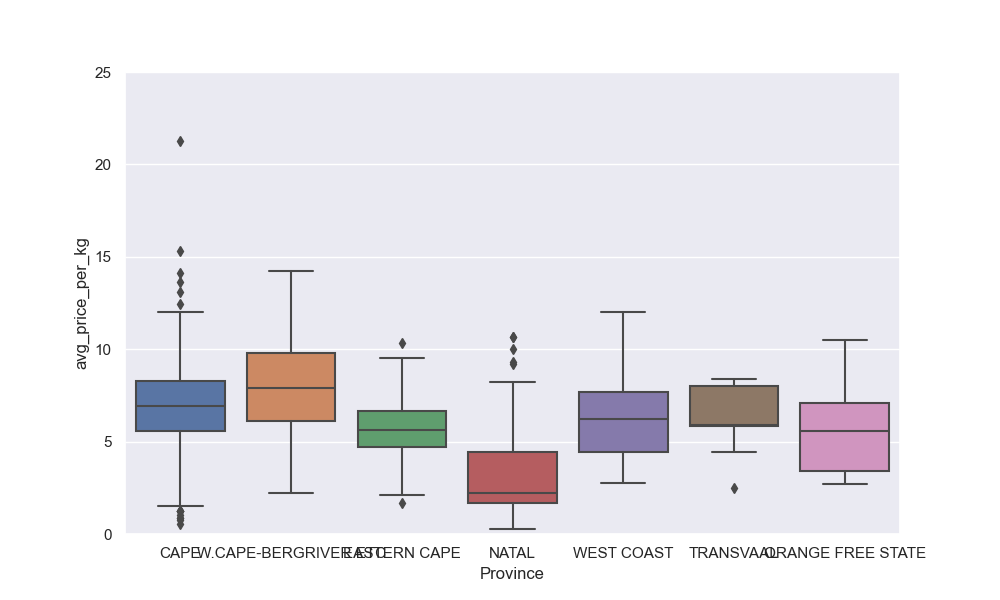

In [126]:
#box plot Province/avg_price_per_kg
var = 'Province'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

<IPython.core.display.Javascript object>


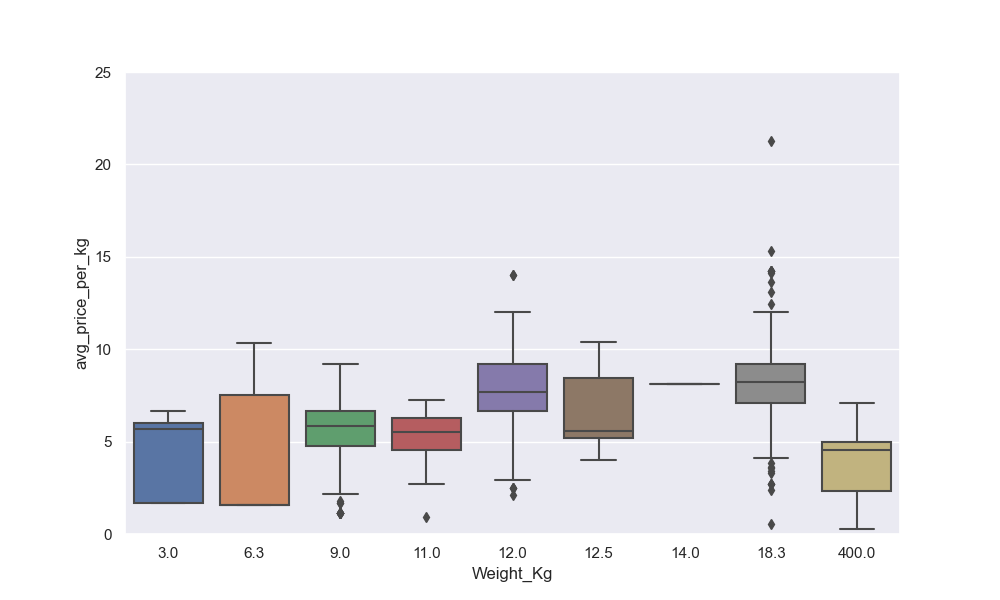

In [127]:
#box plot Weight/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

<IPython.core.display.Javascript object>


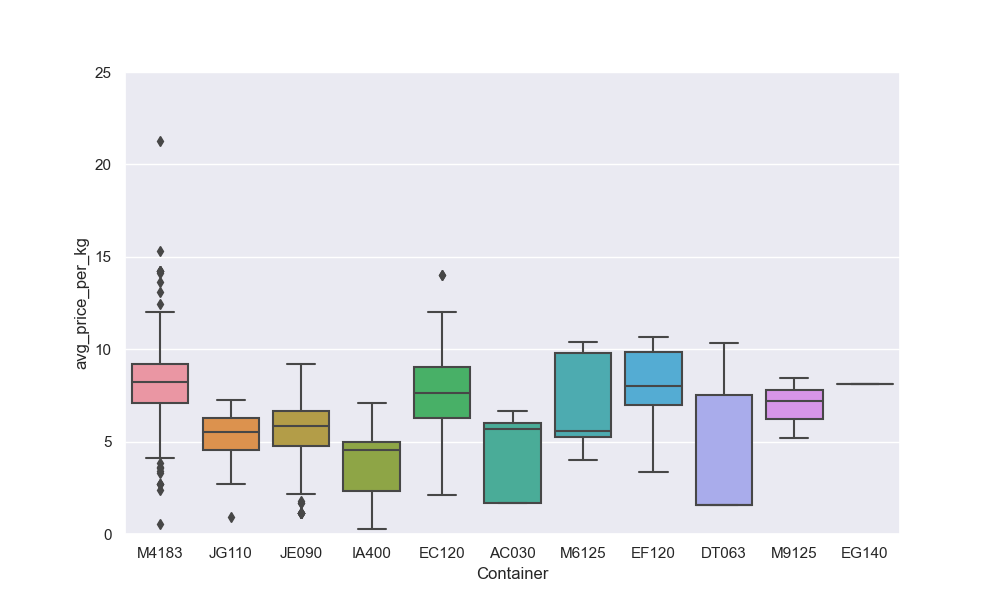

In [128]:
#box plot container/avg_price_per_kg
var = 'Container'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

<IPython.core.display.Javascript object>


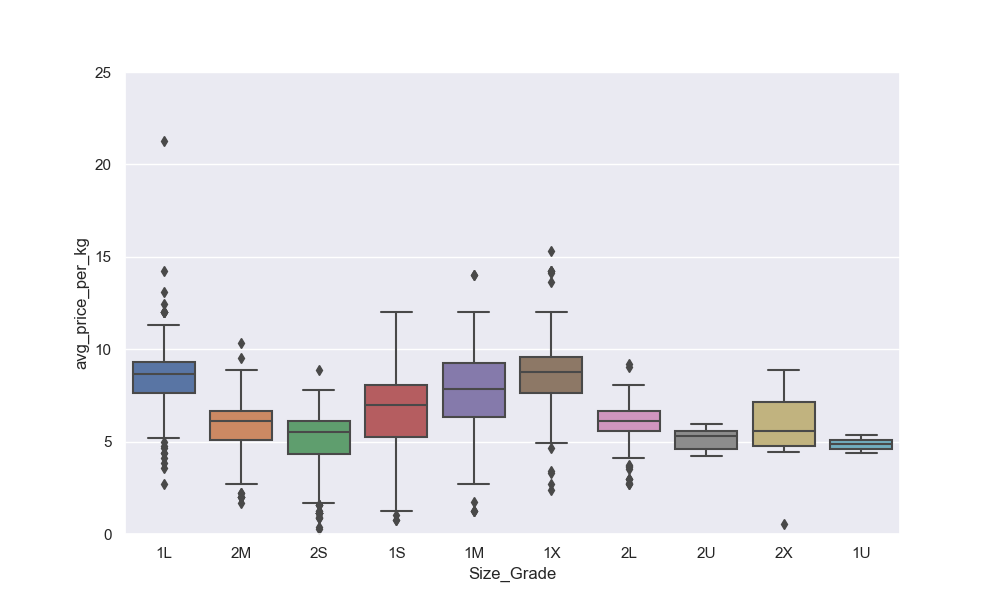

In [129]:
#box plot Size_Grade/avg_price_per_kg
var = 'Size_Grade'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

<IPython.core.display.Javascript object>


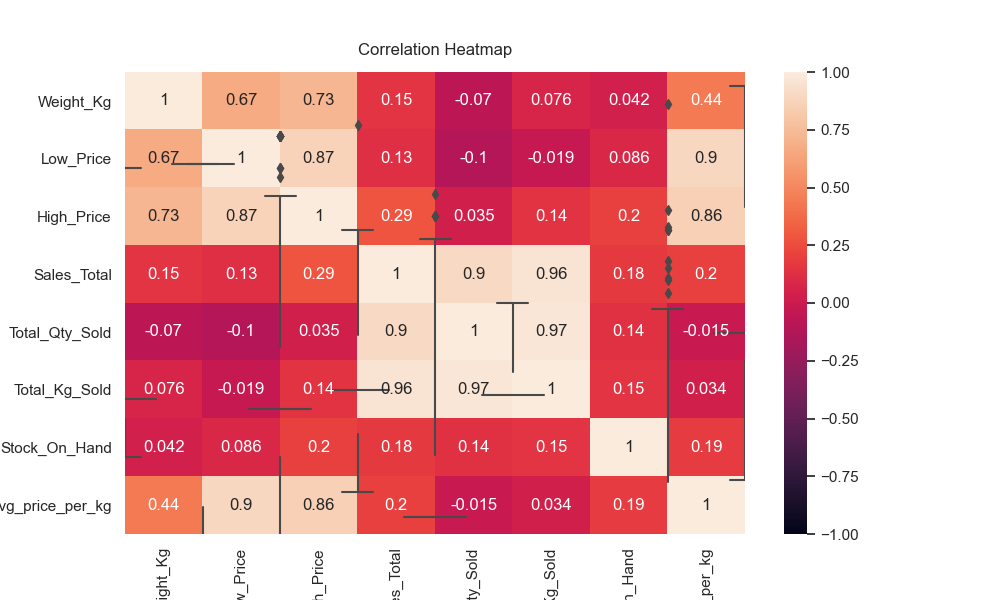

In [130]:
#box plot weight/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

In [131]:
# Import the split function from sklearn
from sklearn.model_selection import train_test_split

In [132]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

apples_df = apples_df[~((apples_df < (Q1 - 1.5 * IQR)) |(apples_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [133]:
apples_df.shape

(1016, 13)

In [134]:
apples_df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.671606,0.726230,0.150055,-0.070160,0.075921,0.042405,0.440842
Low_Price,0.671606,1.000000,0.873171,0.126367,-0.103212,-0.018548,0.086072,0.896809
High_Price,0.726230,0.873171,1.000000,0.287427,0.034932,0.142606,0.195541,0.857025
Sales_Total,0.150055,0.126367,0.287427,1.000000,0.902961,0.957573,0.176963,0.195407
Total_Qty_Sold,-0.070160,-0.103212,0.034932,0.902961,1.000000,0.968872,0.138074,-0.014624
Total_Kg_Sold,0.075921,-0.018548,0.142606,0.957573,0.968872,1.000000,0.150437,0.033537
Stock_On_Hand,0.042405,0.086072,0.195541,0.176963,0.138074,0.150437,1.000000,0.186761
avg_price_per_kg,0.440842,0.896809,0.857025,0.195407,-0.014624,0.033537,0.186761,1.000000


In [135]:
#correlation matrix
heatmap = sns.heatmap(apples_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<IPython.core.display.Javascript object>


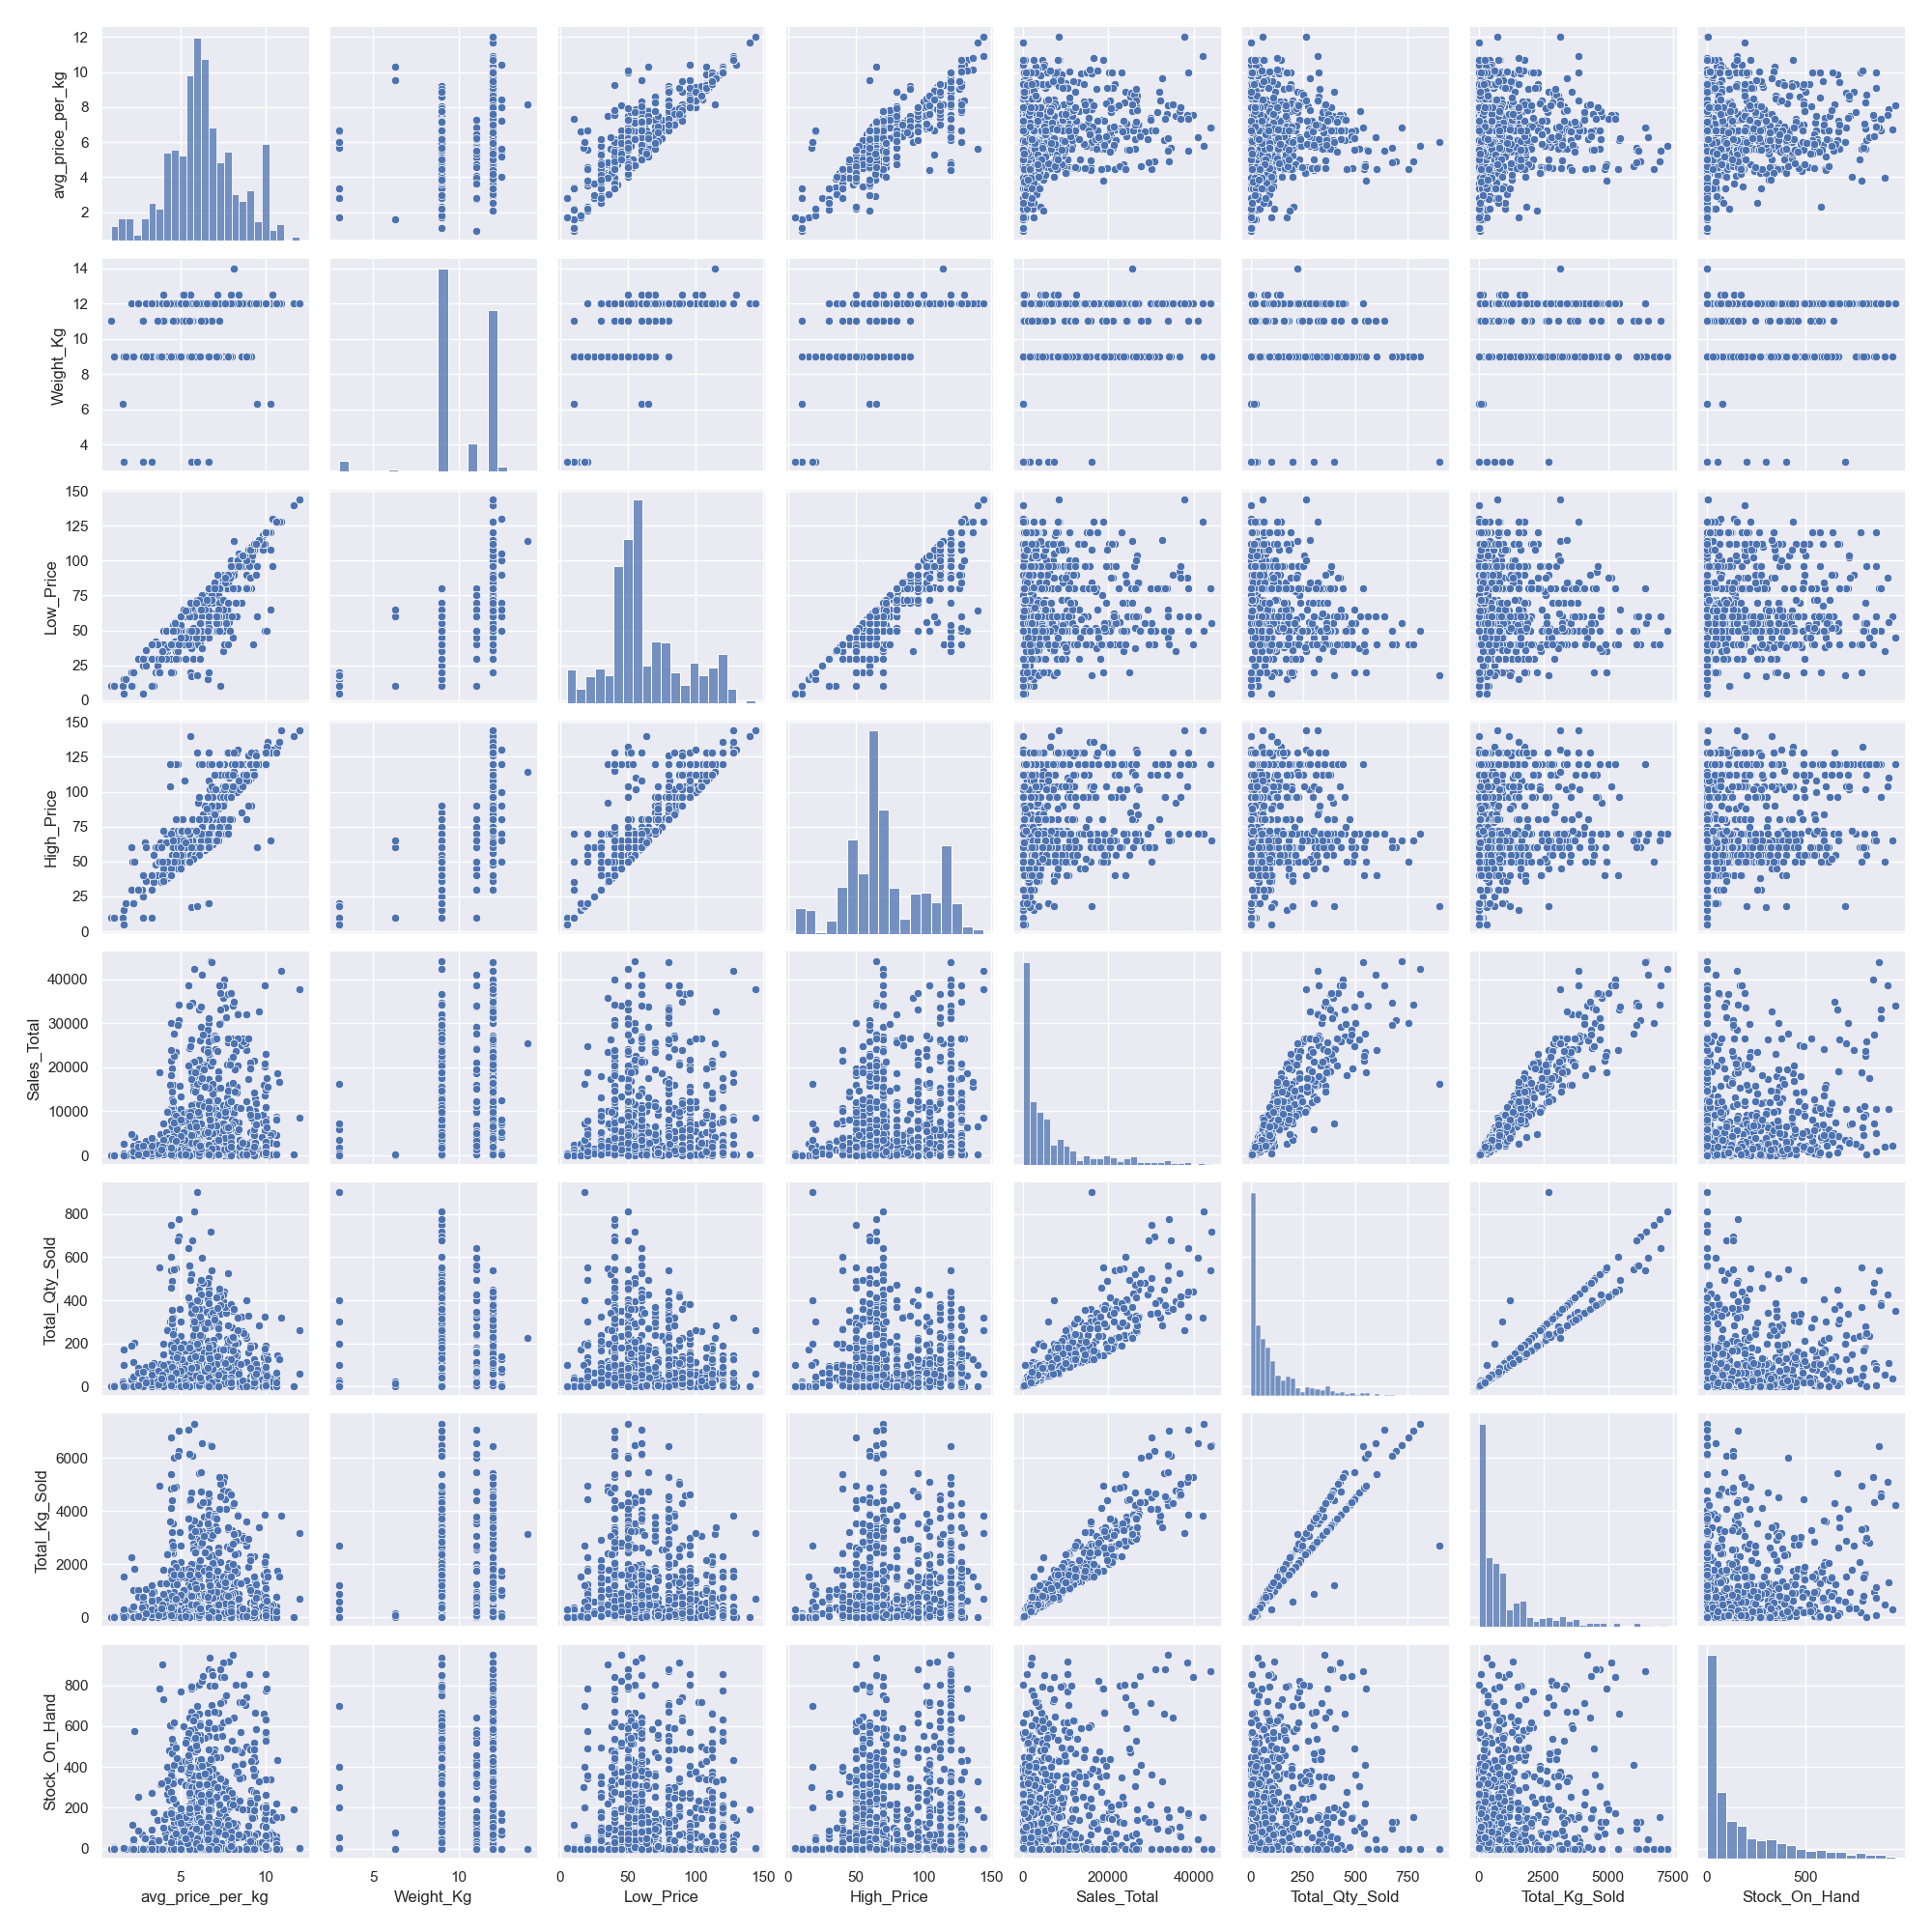

In [136]:
#scatterplot all variables
sns.set()
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

<IPython.core.display.Javascript object>


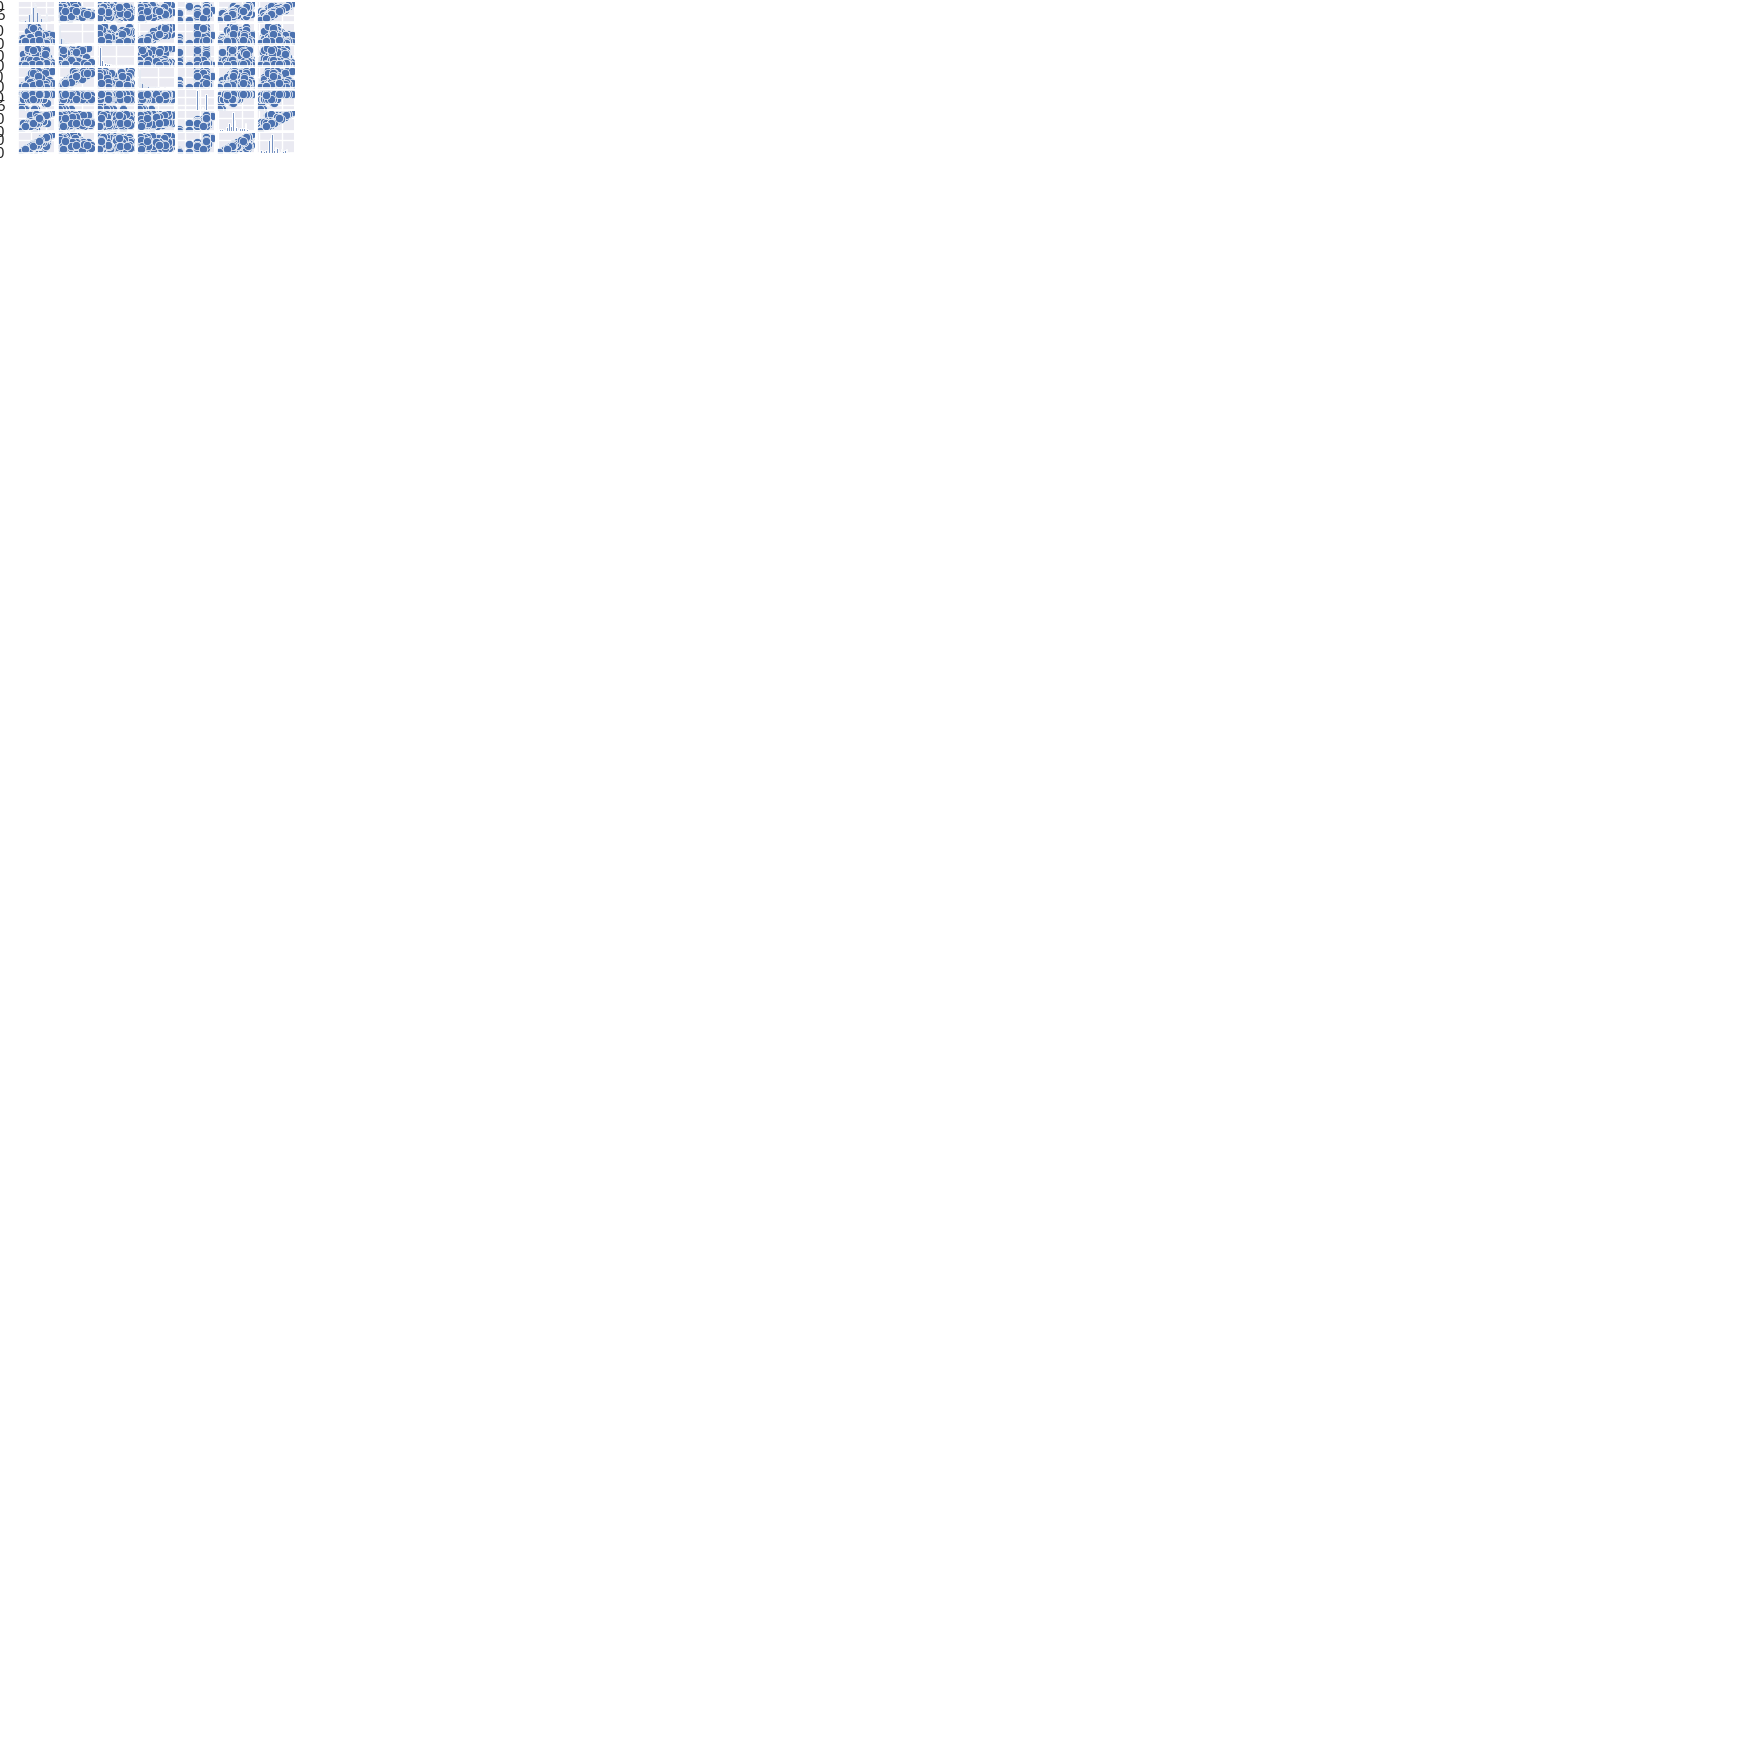

In [137]:
#weak to strong positive correlation
sns.set()
cols = ['avg_price_per_kg', 'Total_Kg_Sold', 'Stock_On_Hand', 'Sales_Total', 'Weight_Kg', 'High_Price', 'Low_Price']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

C:\Users\rinki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


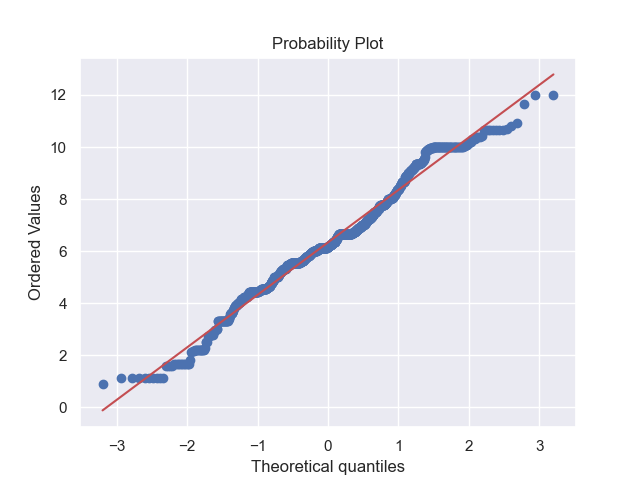

In [138]:
#histogram and normal probability plot

sns.distplot(apples_df['avg_price_per_kg'], fit=norm);
figure = plt.figure()
prob_plot = stats.probplot(apples_df['avg_price_per_kg'], plot=plt)

In [139]:
#applying log transformation
#apples_df['avg_price_per_kg'] = np.log(apples_df['avg_price_per_kg'])

In [140]:
#transformed histogram and normal probability plot
#sns.distplot(apples_df['avg_price_per_kg'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(apples_df['avg_price_per_kg'], plot=plt)

In [141]:
#convert categorical variable into dummy
categorical_variables = [feature for feature in apples_df.columns if apples_df[feature].dtypes=='O']

In [142]:
copy_train=apples_df.copy()

In [143]:
final_df = pd.concat([copy_train,test],axis=0)

In [144]:
def cat_cols(cols): #The function takes a list of categorcial features/columns.
    df_final=final_df
    i=0
    
    for fields in cols:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
    return df_final

In [145]:
final_df['avg_price_per_kg']

7      4.55
80     6.11
117    8.33
122    6.36
162    8.67
       ... 
680     NaN
681     NaN
682     NaN
683     NaN
684     NaN
Name: avg_price_per_kg, Length: 1701, dtype: float64

In [146]:
final_df = cat_cols(categorical_variables)

Province
Container
Size_Grade
Commodities
Date


In [147]:
final_df.shape

(1701, 180)

In [148]:
final_df = final_df.loc[:,~final_df.columns.duplicated()] #Remove duplicated features.

In [149]:
final_df.shape

(1701, 180)

In [150]:
final_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,EASTERN CAPE,...,2020-09-07,2020-09-09,2020-09-16,2020-09-17,2020-09-19,2020-09-21,2020-09-23,2020-09-28,2020-10-01,2020-10-03
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,NaN,0,...,0,0,0,0,0,0,0,0,0,0
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,NaN,0,...,0,0,0,0,0,0,0,0,0,0
117,12.0,100.0,100.0,1200.0,12,144.0,119,8.33,NaN,0,...,0,0,0,0,0,0,0,0,0,0
122,11.0,70.0,70.0,5600.0,80,880.0,0,6.36,NaN,0,...,0,0,0,0,0,0,0,0,0,0
162,12.0,104.0,104.0,2392.0,23,276.0,0,8.67,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test.shape

(685, 13)

In [152]:
#Seperating our final train and test datasets.
df_Train = final_df.iloc[:1016,:]
df_Test = final_df.iloc[1016:,:]

In [153]:
df_Test

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,EASTERN CAPE,...,2020-09-07,2020-09-09,2020-09-16,2020-09-17,2020-09-19,2020-09-21,2020-09-23,2020-09-28,2020-10-01,2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,NaN,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,NaN,3.0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,NaN,4.0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,NaN,5.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,9.0,30.0,30.0,1320.0,44,396.0,856,NaN,681.0,0,...,0,0,0,0,0,0,0,0,0,0
681,12.0,50.0,132.0,6290.0,52,624.0,785,NaN,682.0,0,...,0,0,0,0,0,0,0,0,0,0
682,9.0,55.0,55.0,220.0,4,36.0,170,NaN,683.0,0,...,0,0,0,0,0,0,0,0,0,0
683,18.3,120.0,150.0,27840.0,202,3696.6,0,NaN,684.0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df_Test.drop('avg_price_per_kg',axis=1,inplace=True)

C:\Users\rinki\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
X = df_Train.drop('avg_price_per_kg',axis=1)
y = df_Train['avg_price_per_kg']

In [156]:
len(y)

1016

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [158]:
y_test

28731     3.94
8774      6.34
61561     7.22
48812    10.67
58869     1.11
         ...  
51518     7.82
31212     5.84
39348     6.00
48396     6.11
50802     6.75
Name: avg_price_per_kg, Length: 102, dtype: float64

In [159]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train

SyntaxError: unexpected EOF while parsing (<ipython-input-159-0f5d1255d0b1>, line 2)

In [ ]:
file_name = 'XGboost_model.pkl'
pickle.dump(xgb, open(file_name, 'wb'))

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

In [ ]:
score = r2_score(y_test,y_pred)
score

In [ ]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
pred = pd.DataFrame(y_pred)

In [162]:
sample_sub = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/sample_submission.csv")
alldatasets = pd.concat([sample_sub['Index'], pred], axis = 1)
alldatasets.columns = ['Index', 'Price']
alldatasets.to_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/sample_submission.csv", index = False)

NameError: name 'pred' is not defined